In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.linear_model import LinearRegression
from scipy import stats

In [3]:
sns.set(style='whitegrid', color_codes=True)

For more seaborn styles, visit [https://seaborn.pydata.org/generated/seaborn.set_style.html](https://seaborn.pydata.org/generated/seaborn.set_style.html).

# Exercise 8

In [4]:
auto = pd.read_csv('data/auto.csv', index_col=0)

In [5]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## 8a (statsmodels)

In [6]:
import statsmodels.api as sm

In [7]:
X = auto['horsepower']
y = auto['mpg']

In [9]:
X = sm.add_constant(X)
X.head()

,const,horsepower
1,1.0,130
2,1.0,165
3,1.0,150
4,1.0,150
5,1.0,140


In [10]:
model = sm.OLS(y, X).fit()

In [11]:
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.605    
Dependent Variable: mpg              AIC:                2361.3237
Date:               2019-03-01 20:29 BIC:                2369.2662
No. Observations:   392              Log-Likelihood:     -1178.7  
Df Model:           1                F-statistic:        599.7    
Df Residuals:       390              Prob (F-statistic): 7.03e-81 
R-squared:          0.606            Scale:              24.066   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const         39.9359    0.7175   55.6598  0.0000  38.5252  41.3465
horsepower    -0.1578    0.0064  -24.4891  0.0000  -0.1705  -0.1452
------------------------------------------------------------------
Omnibus:               16.432       Durbin-Watson:          0.920 
Prob(Omn

- `Adj. R-squared` reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
- `const` coef(ficient) is your y-intercept. It means that if `x1` (`horsepower`) is zero, then the expected output (i.e., the y) would be equal to the const coefficient.
- `x1` coef(ficient) (i.e. `horsepower`) represents the change in the output y due to a change of one unit in `x1` (everything else held constant).
- `Std.Err.` reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy.
- `P >|t|` is your p-value. A p-value of less than 0.05 is considered to be statistically significant.
- Confidence Interval `[0.025   0.975]` represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

In [12]:
# R-squared
model.rsquared

0.6059482578894348

In [13]:
# F-statistic
model.fvalue

599.7177409015787

In [14]:
# Prob (F-statistic)
model.pvalues[1]

7.031989029404463e-81

In [15]:
# intercept and coefficient
model.params

const         39.935861
horsepower    -0.157845
dtype: float64

In [16]:
# horsepower of 98
hp98 = np.array([1, 98])

In [17]:
# predicted mpg associated with a horsepower of 98
model.predict(hp98)

array([24.46707715])

In [18]:
model.get_prediction(hp98).conf_int()

array([[23.97307896, 24.96107534]])

In [19]:
model.get_prediction(hp98).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


In [20]:
# prediction
model.get_prediction(hp98).summary_frame()[['mean']]

,mean
0,24.467077


In [21]:
# confidence interval
model.get_prediction(hp98).summary_frame()[['mean_ci_lower', 'mean_ci_upper']]

,mean_ci_lower,mean_ci_upper
0,23.973079,24.961075


In [22]:
# observation confidence interval (prediction)
model.get_prediction(hp98).summary_frame()[['obs_ci_lower', 'obs_ci_upper']]

,obs_ci_lower,obs_ci_upper
0,14.809396,34.124758


* [i] Yes, there is a relationship between predictor and response (since the F-statistic `599.7` is far larger than 1)  
* [ii] There is relationship is strong between predictor ans response (since the p-value `7.03e-81` is close to 0)  
* [iii] The relationship is negative (since the coefficient `-0.15784473` is negative)  
* [iv] The predicted `mpg` for a `horsepower` of `98` is `24.467077`. The confidence interval is `[23.973079, 24.961075]` and the prediction interval is `14.809396, 34.124758`.

In [23]:
model.predict()[:10]

array([19.41604569, 13.89148002, 16.25915102, 16.25915102, 17.83759835,
        8.68260382,  5.21001968,  5.99924335,  4.42079602,  9.94536168])

## 8b (statsmodels)

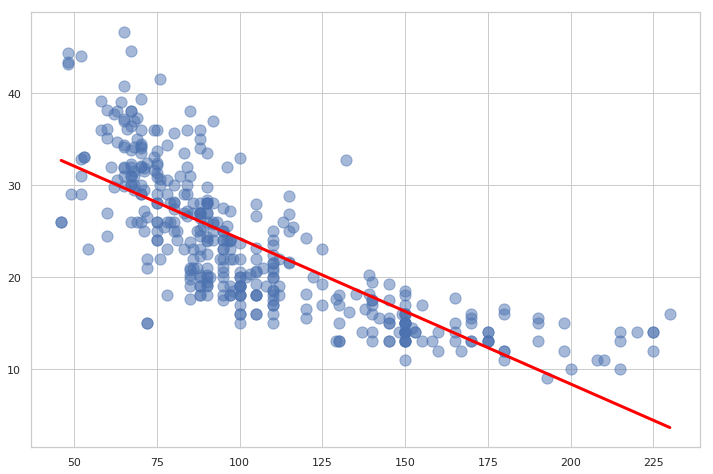

In [24]:
fig, ax = plt.subplots(1, figsize=(12, 8))

# scatter plot
plt.scatter(x=auto['horsepower'], y=auto['mpg'], s=125, alpha=0.5)

# regression line
x = np.array([min(auto['horsepower']), max(auto['horsepower'])])
y = model.params[0] + model.params[1] * x
plt.plot(x, y, color='red', linestyle='-', linewidth=3)

plt.show()

## 8c (statsmodels)

In [25]:
# fitted values (need a constant term for intercept)
model_fitted_y = model.fittedvalues

# model residuals
model_residuals = model.resid

# normalized residuals
model_norm_residuals = model.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model.get_influence().cooks_distance[0]

More information on interpretation the plots below, visit:
* [https://data.library.virginia.edu/diagnostic-plots](https://data.library.virginia.edu/diagnostic-plots)
* [https://www.r-bloggers.com/model-validation-interpreting-residual-plots](https://www.r-bloggers.com/model-validation-interpreting-residual-plots)

### Residual plot

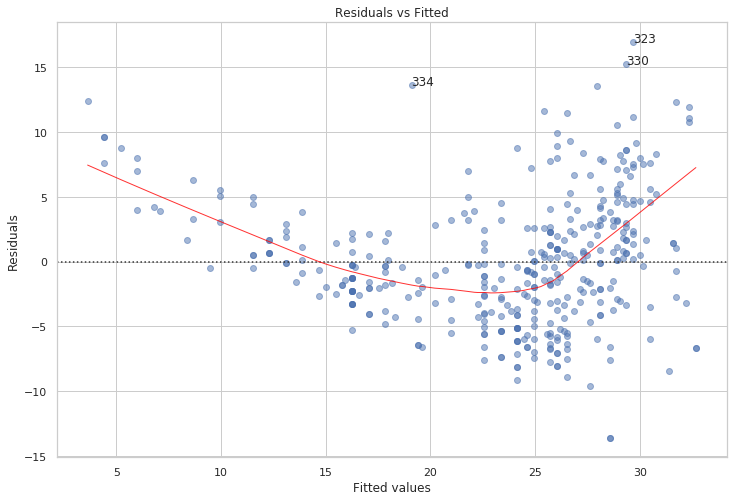

In [26]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'mpg', data=auto, lowess=True, 
                                  scatter_kws={'alpha': 0.5}, 
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, xy=(model_fitted_y[i], model_residuals[i]))

### QQ Plot

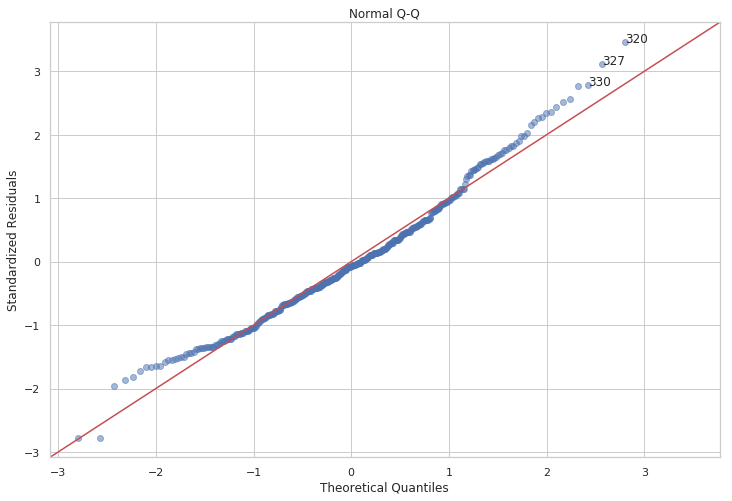

In [27]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, xy=(np.flip(QQ.theoretical_quantiles, 0)[r], model_norm_residuals[i]))

### Scale-Location Plot

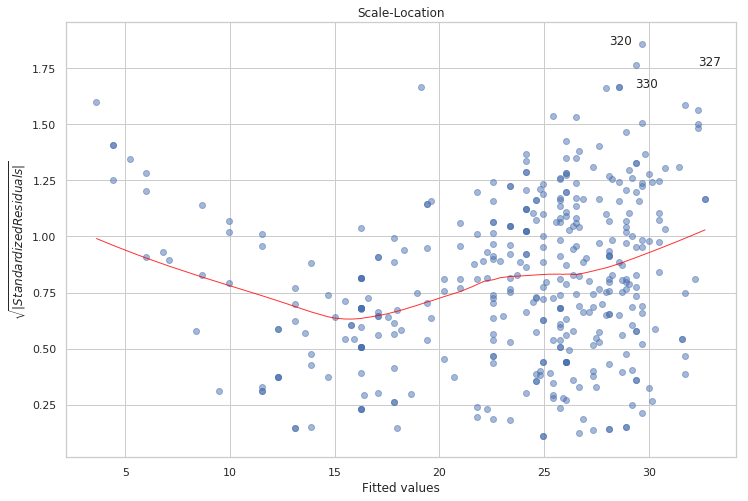

In [28]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, xy=(model_fitted_y[i], model_norm_residuals_abs_sqrt[i]))

### Leverage plot (Cook's distance not visable, but resembles R plot)

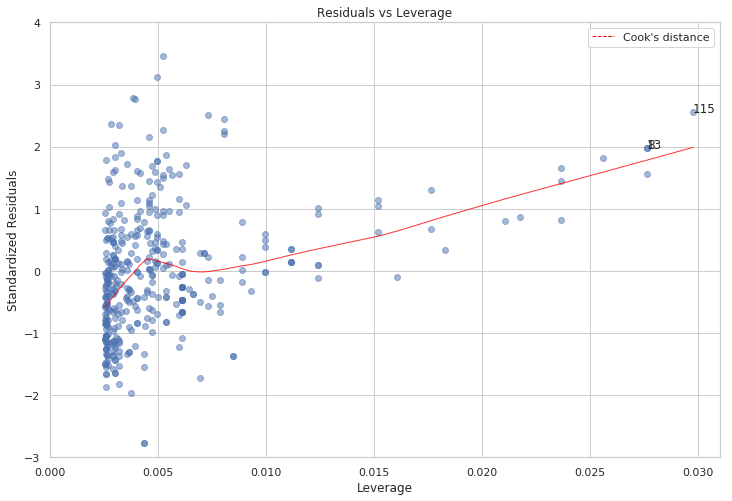

In [29]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.031)
plot_lm_4.axes[0].set_ylim(-3, 4)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, xy=(model_leverage[i], model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), np.linspace(0.001, 0.200, 50), 'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), np.linspace(0.001, 0.200, 50)) # 1 line

plt.legend(loc='upper right');
plt.show()

### Leverage plot

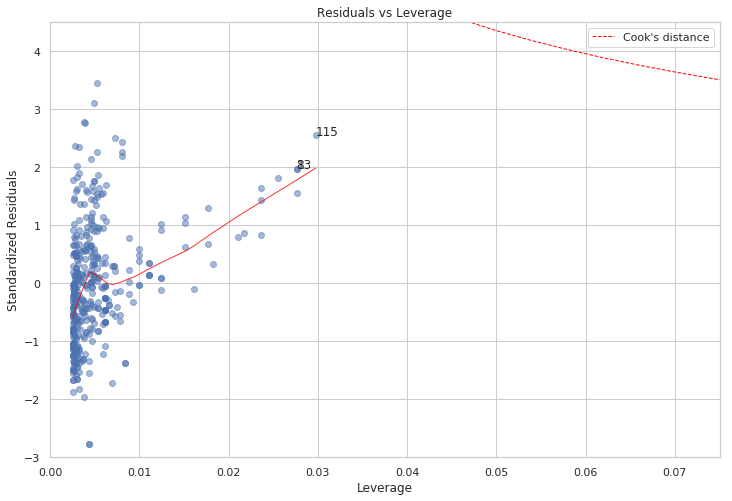

In [30]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.075)
plot_lm_4.axes[0].set_ylim(-3, 4.5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, xy=(model_leverage[i], model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), np.linspace(0.001, 0.200, 50), 'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), np.linspace(0.001, 0.200, 50)) # 1 line

plt.legend(loc='upper right');
plt.show()

### statmodels regression plots

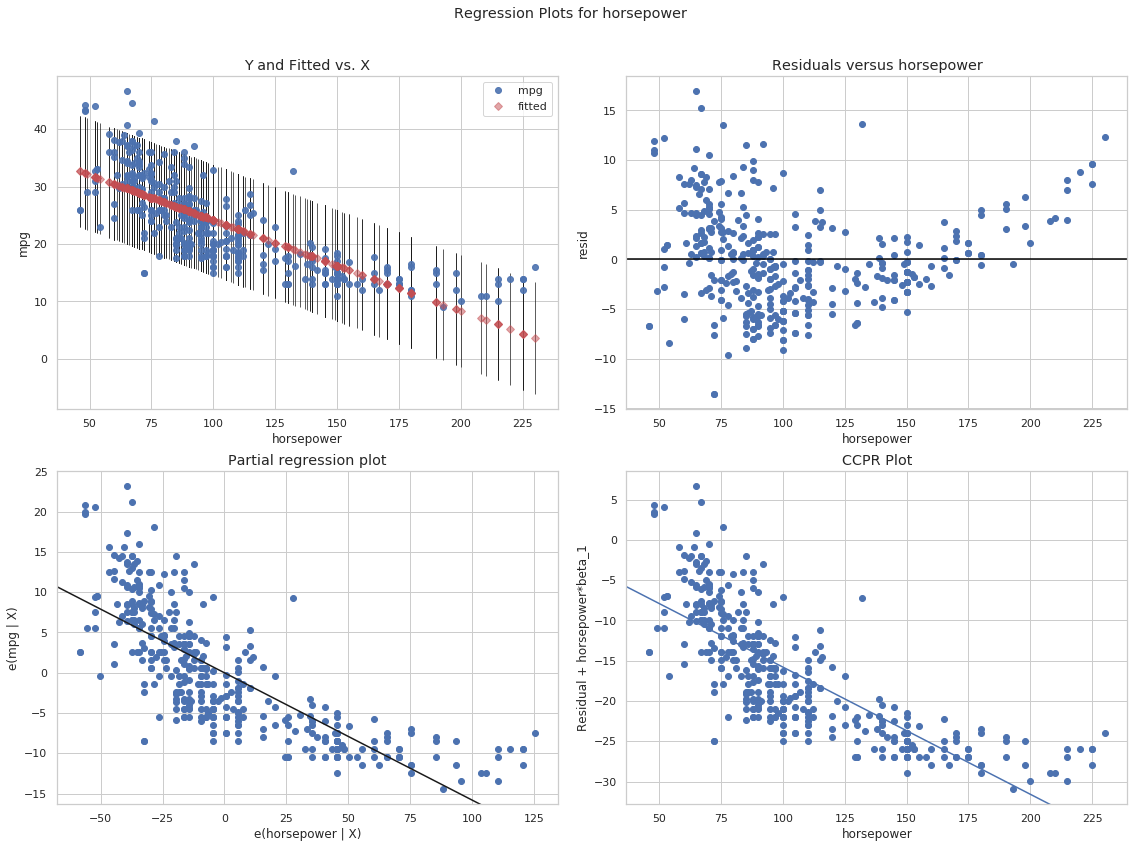

In [31]:
fig = plt.figure(figsize=(16, 12))
fig = sm.graphics.plot_regress_exog(model,'horsepower', fig=fig)

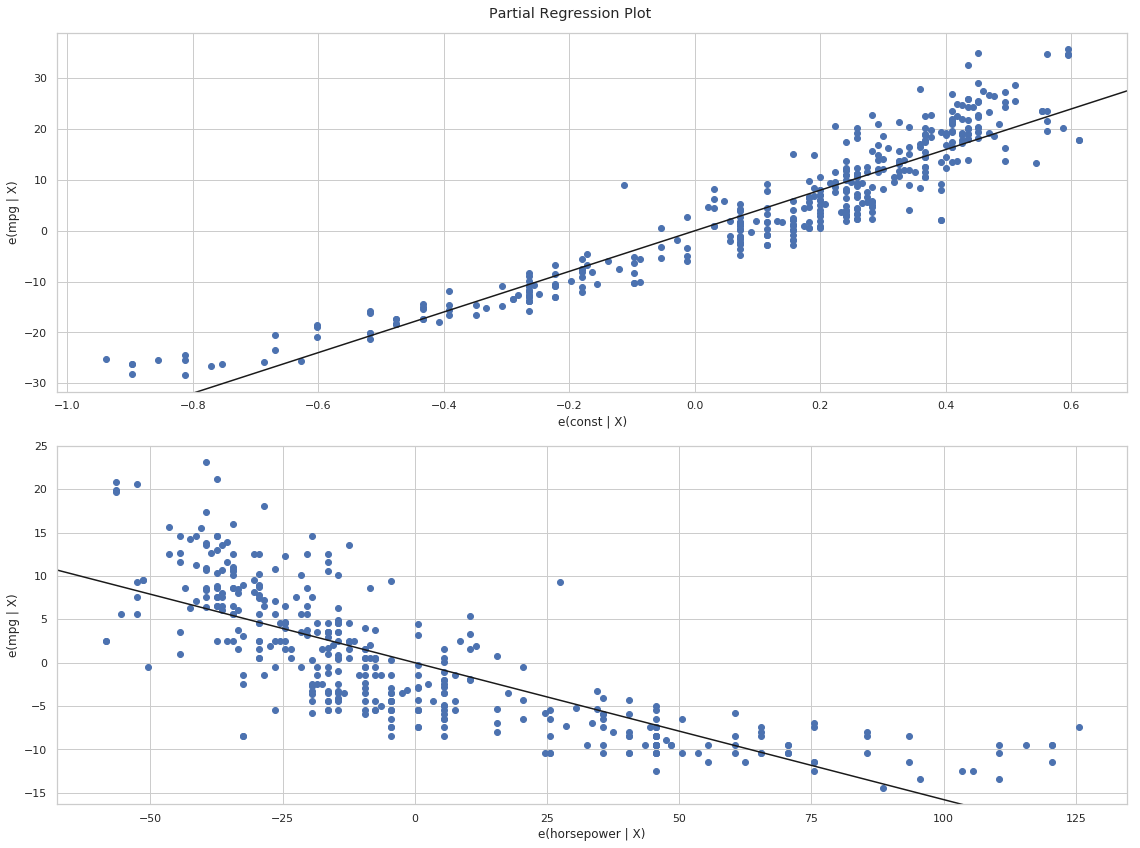

In [32]:
fig = plt.figure(figsize=(16, 12))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
plt.show()

## 8a (scikit-learn)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
X = auto['horsepower'].values.reshape(-1, 1)
y = auto['mpg'].values

In [35]:
reg = LinearRegression().fit(X, y)

In [36]:
# R-squared
reg.score(X, y)

0.6059482578894348

In [37]:
# Coefficient
reg.coef_

array([-0.15784473])

In [38]:
# Intercept
reg.intercept_ 

39.93586102117047

In [39]:
# Prediction for (new) value
reg.predict(np.array([[98]]))

array([24.46707715])

## 8b (scikit-learn)

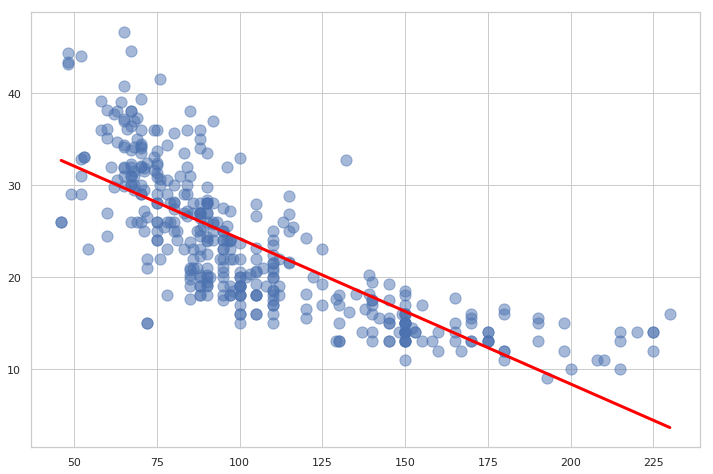

In [40]:
fig, ax = plt.subplots(1, figsize=(12, 8))

# scatter plot
plt.scatter(x=auto['horsepower'], y=auto['mpg'], s=125, alpha=0.5)

# regression line
x = np.array([min(auto['horsepower']), max(auto['horsepower'])])
y = reg.intercept_ + reg.coef_ * x
plt.plot(x, y, color='red', linestyle='-', linewidth=3)

plt.show()

## 8a (Scipy)

In [41]:
from scipy import stats

In [42]:
X = auto['horsepower']
y = auto['mpg']

In [43]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)

In [44]:
# Slope
slope

-0.15784473335365354

In [45]:
# Intercept
intercept

39.93586102117045

In [46]:
# R-value
r_value

-0.7784267838977759

In [47]:
# R-squared
r_value ** 2

0.6059482578894346

In [48]:
# Prob (F-statistic)
p_value

7.031989029404864e-81

In [49]:
# Std.Err.
std_err

0.006445500517685033

## 8b (seaborn)

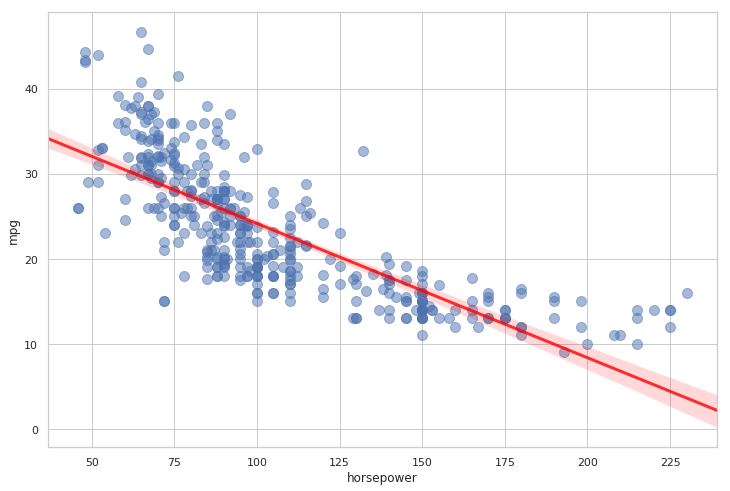

In [50]:
fig, ax = plt.subplots(1, figsize=(12, 8))
sns.regplot(
    ax=ax,
    x='horsepower',
    y='mpg',
    data=auto,
    scatter_kws={'alpha':0.5, 's':100},
    line_kws={'color':'red', 'alpha':0.8, 'lw': 3}
)
plt.show()

# EXERCISE 9

In [51]:
auto = pd.read_csv('data/auto.csv', index_col=0)

In [52]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## 9a

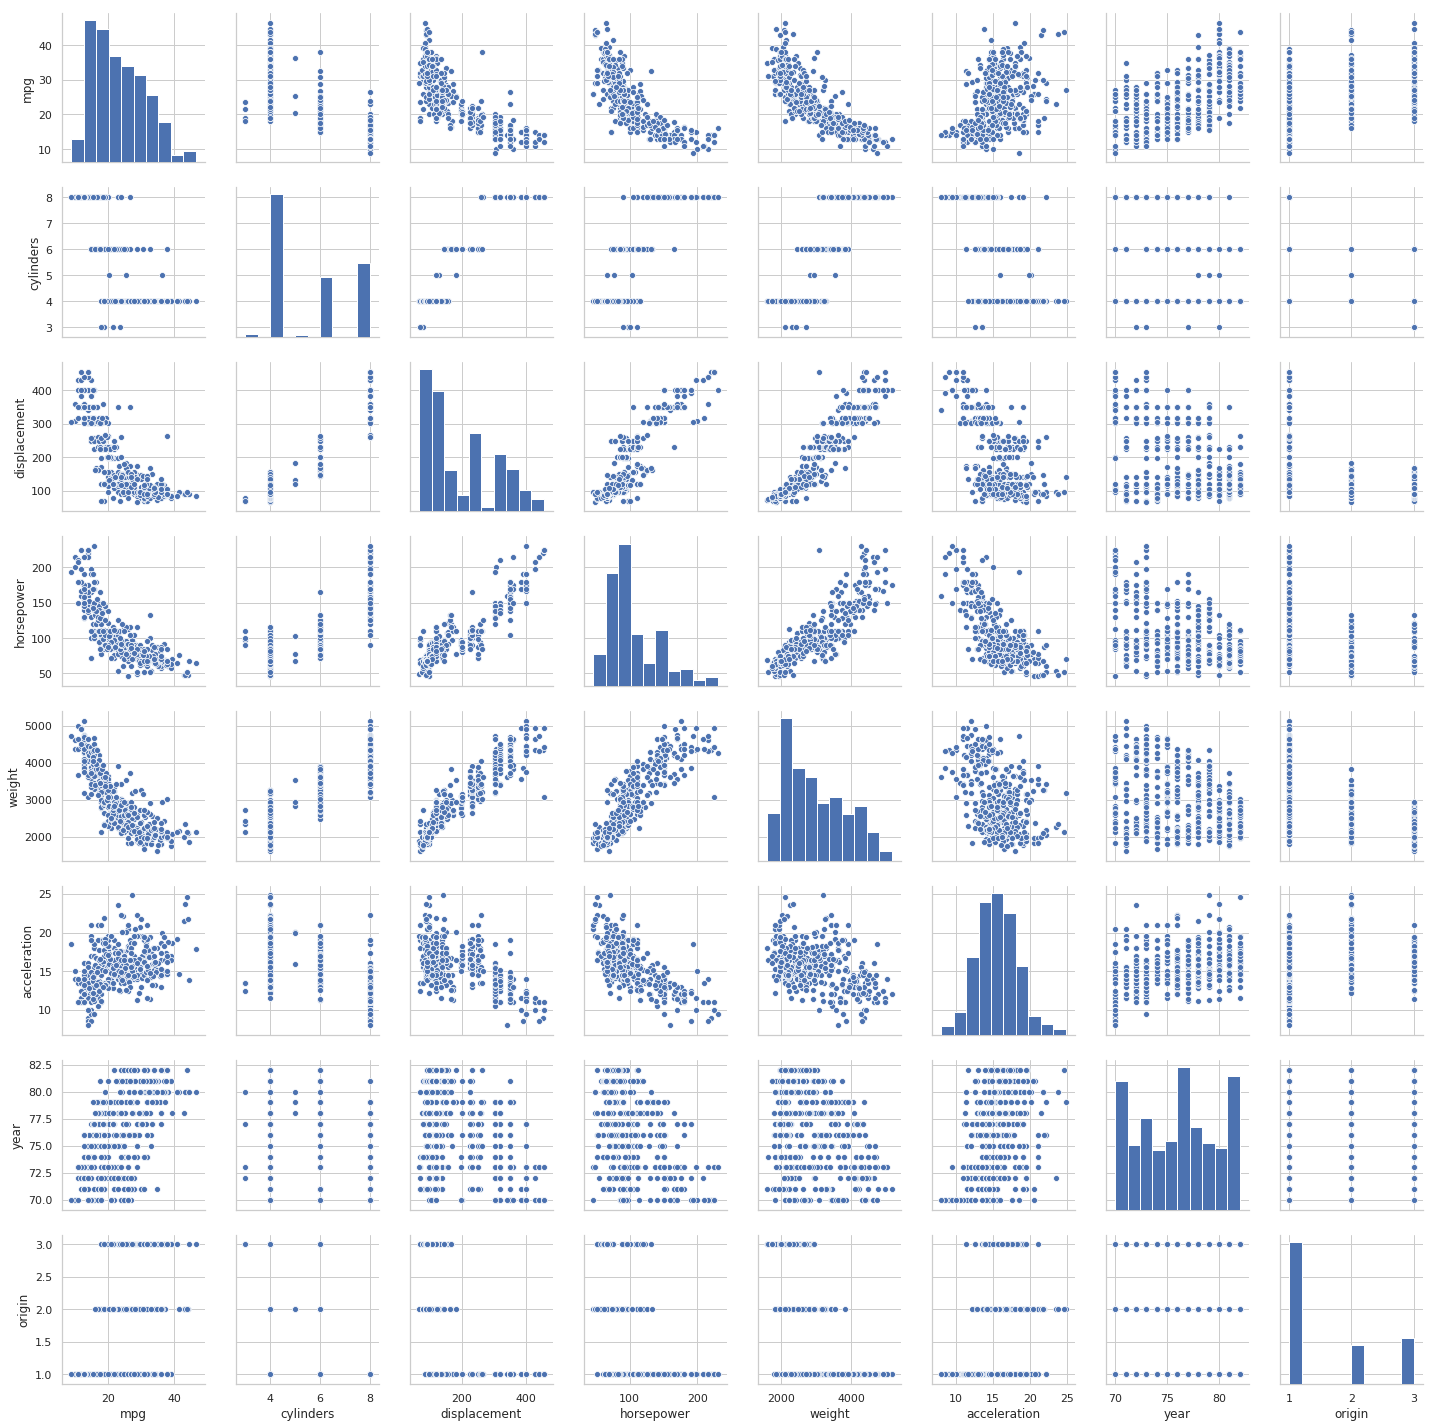

In [53]:
sns.pairplot(auto)
plt.show()

## 9b

In [54]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


## 9c (statsmodels)

In [55]:
import statsmodels.api as sm

In [56]:
X = auto.loc[:, 'cylinders':'origin']
y = auto['mpg']

In [57]:
X = sm.add_constant(X)
X.head()

/home/rene/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,cylinders,displacement,horsepower,weight,acceleration,year,origin
1,1.0,8,307.0,130,3504,12.0,70,1
2,1.0,8,350.0,165,3693,11.5,70,1
3,1.0,8,318.0,150,3436,11.0,70,1
4,1.0,8,304.0,150,3433,12.0,70,1
5,1.0,8,302.0,140,3449,10.5,70,1


In [58]:
model = sm.OLS(y, X)
results = model.fit()

In [59]:
print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.818    
Dependent Variable: mpg              AIC:                2062.9495
Date:               2019-03-01 20:30 BIC:                2094.7196
No. Observations:   392              Log-Likelihood:     -1023.5  
Df Model:           7                F-statistic:        252.4    
Df Residuals:       384              Prob (F-statistic): 2.04e-139
R-squared:          0.821            Scale:              11.073   
------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
------------------------------------------------------------------
const            -17.2184   4.6443 -3.7074 0.0002 -26.3499 -8.0870
cylinders         -0.4934   0.3233 -1.5261 0.1278  -1.1290  0.1422
displacement       0.0199   0.0075  2.6474 0.0084   0.0051  0.0347
horsepower        -0.0170   0.0138 -1.2295 0.2196  -0.0441  0.0102
weight       

## 9d (statsmodels)

More information on interpretation the plots below, visit:
* [https://data.library.virginia.edu/diagnostic-plots](https://data.library.virginia.edu/diagnostic-plots)
* [https://www.r-bloggers.com/model-validation-interpreting-residual-plots](https://www.r-bloggers.com/model-validation-interpreting-residual-plots)

In [60]:
from statsmodels.graphics.gofplots import ProbPlot

In [61]:
# fitted values (need a constant term for intercept)
model_fitted_y = results.fittedvalues

# model residuals
model_residuals = results.resid

# normalized residuals
model_norm_residuals = results.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = results.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = results.get_influence().cooks_distance[0]

### Residual plot

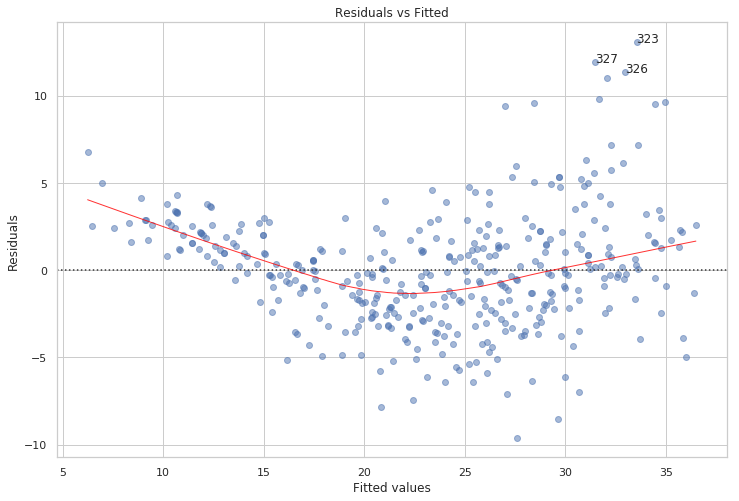

In [62]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'mpg', data=auto, lowess=True, 
                                  scatter_kws={'alpha': 0.5}, 
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, xy=(model_fitted_y[i], model_residuals[i]))

### QQ Plot

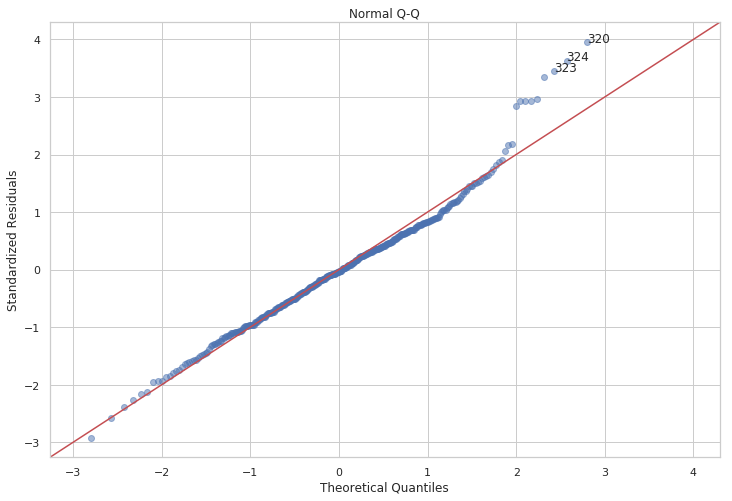

In [63]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, xy=(np.flip(QQ.theoretical_quantiles, 0)[r], model_norm_residuals[i]))

### Scale-Location Plot

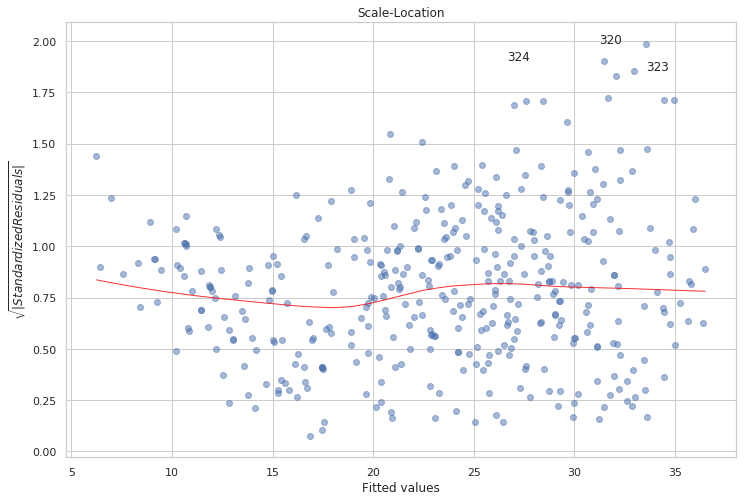

In [64]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, xy=(model_fitted_y[i], model_norm_residuals_abs_sqrt[i]))

### Leverage plot

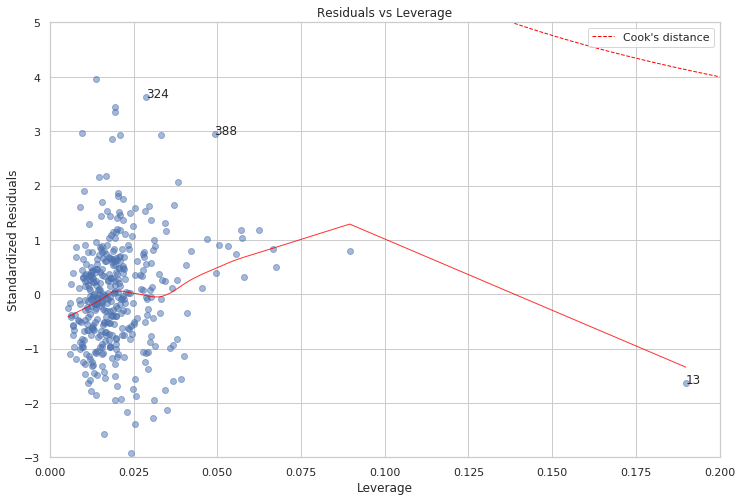

In [65]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, xy=(model_leverage[i], model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(results.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), np.linspace(0.001, 0.200, 50), 'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), np.linspace(0.001, 0.200, 50)) # 1 line

plt.legend(loc='upper right');
plt.show()

### statmodels plots

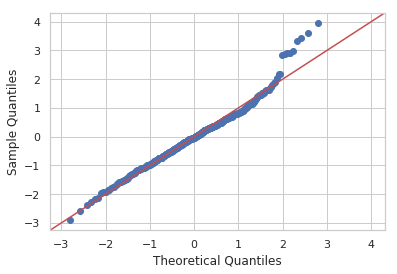

In [66]:
# Q-Q plot
residuals = results.resid
fig = sm.qqplot(residuals, line='45', fit=True)
plt.show()

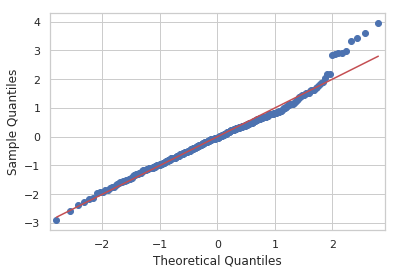

In [67]:
# Q-Q plot
residuals = results.resid
fig = sm.qqplot(residuals, line='s', fit=True)
plt.show()

For more plots, visit [this](https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html) page.

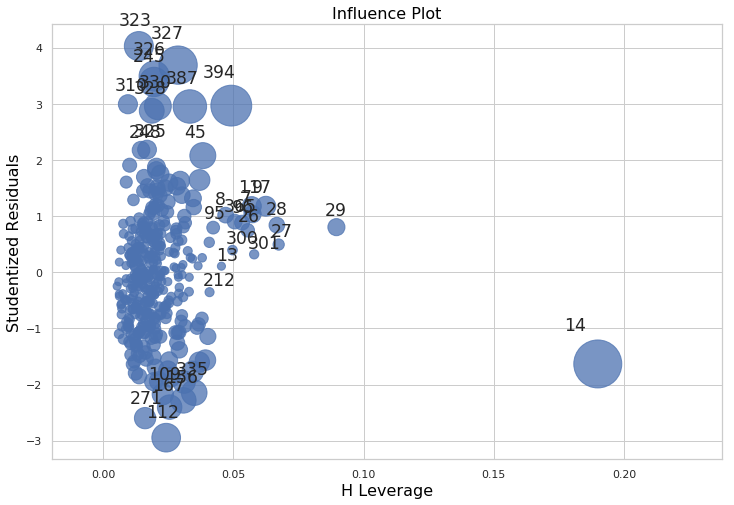

In [68]:
# Influence Plot
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion="cooks")

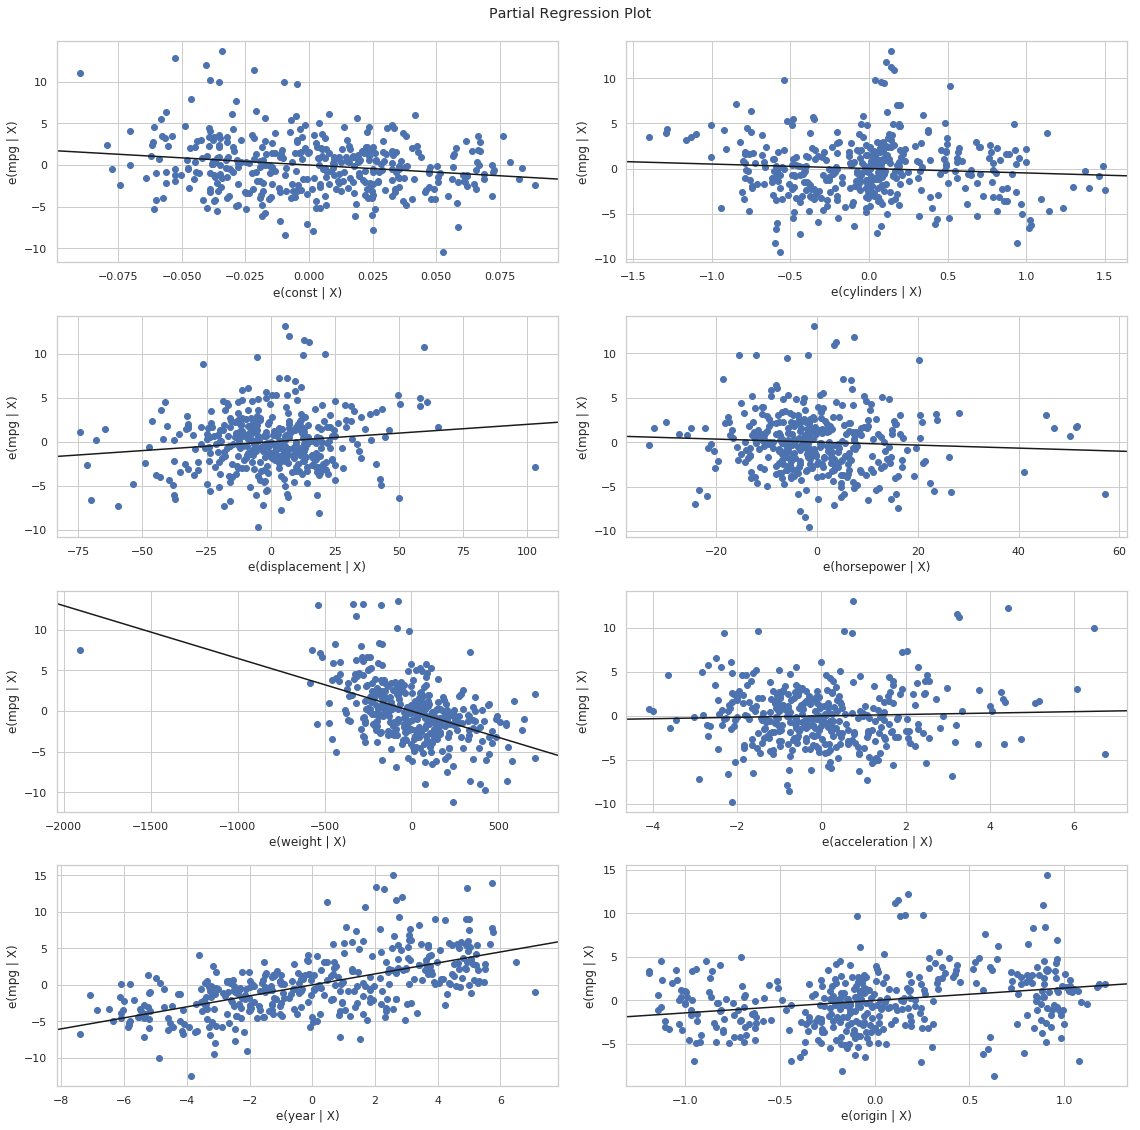

In [69]:
# Partial Regression Plot
fig = plt.figure(figsize=(16, 16))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)
plt.show()

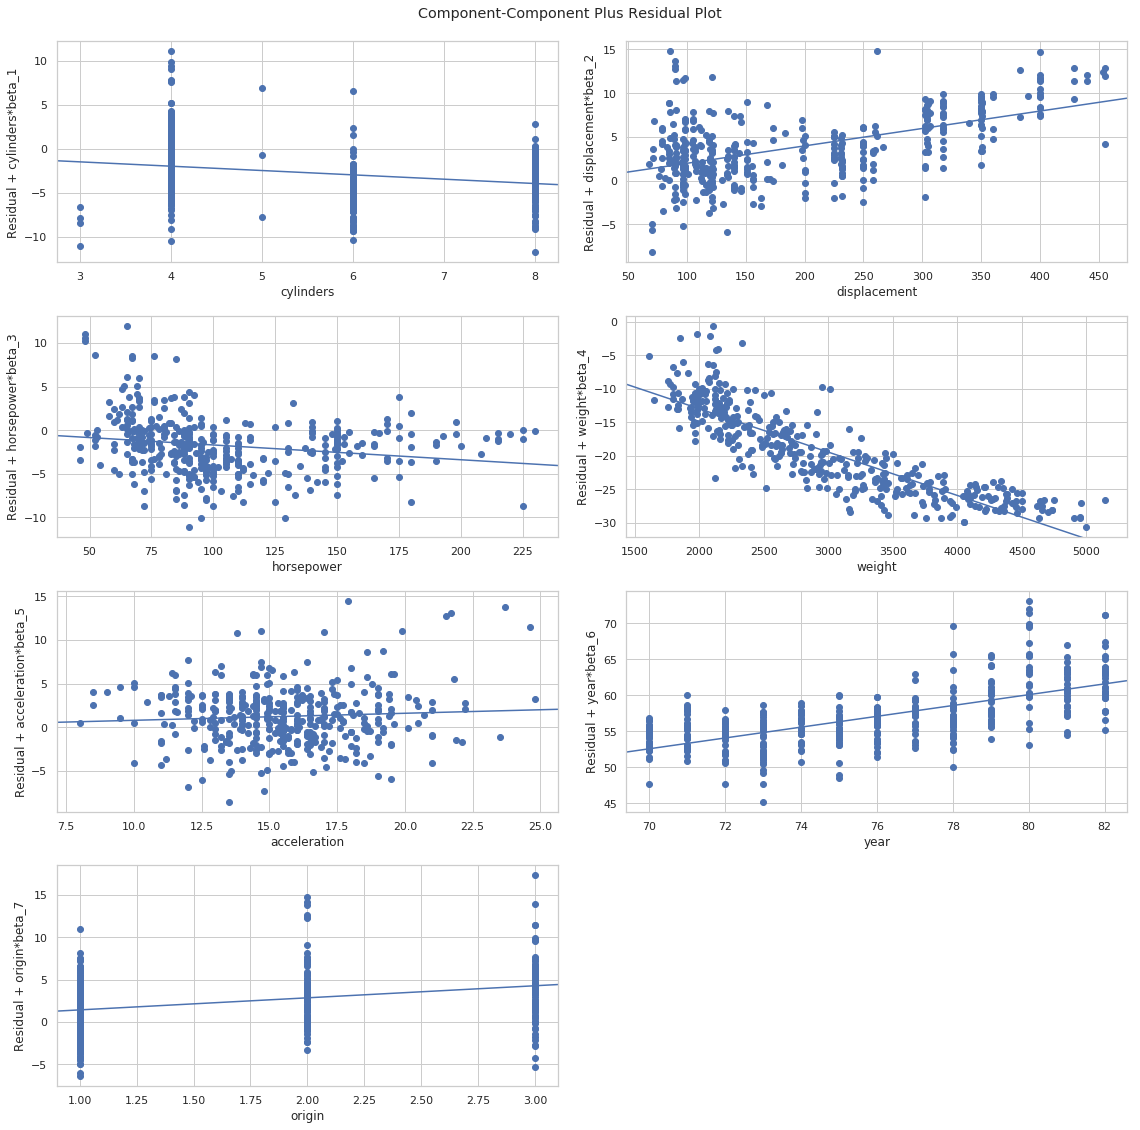

In [70]:
# Component-Component plus Residual (CCPR) Plots
fig = plt.figure(figsize=(16, 16))
fig = sm.graphics.plot_ccpr_grid(results, fig=fig)
plt.show()

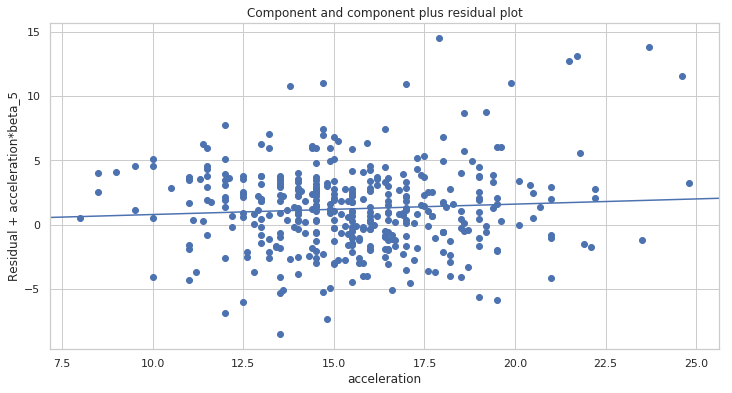

In [71]:
# Component-Component plus Residual (CCPR) Plots
fig, ax = plt.subplots(figsize=(12, 6))
fig = sm.graphics.plot_ccpr(results, "acceleration", ax=ax)

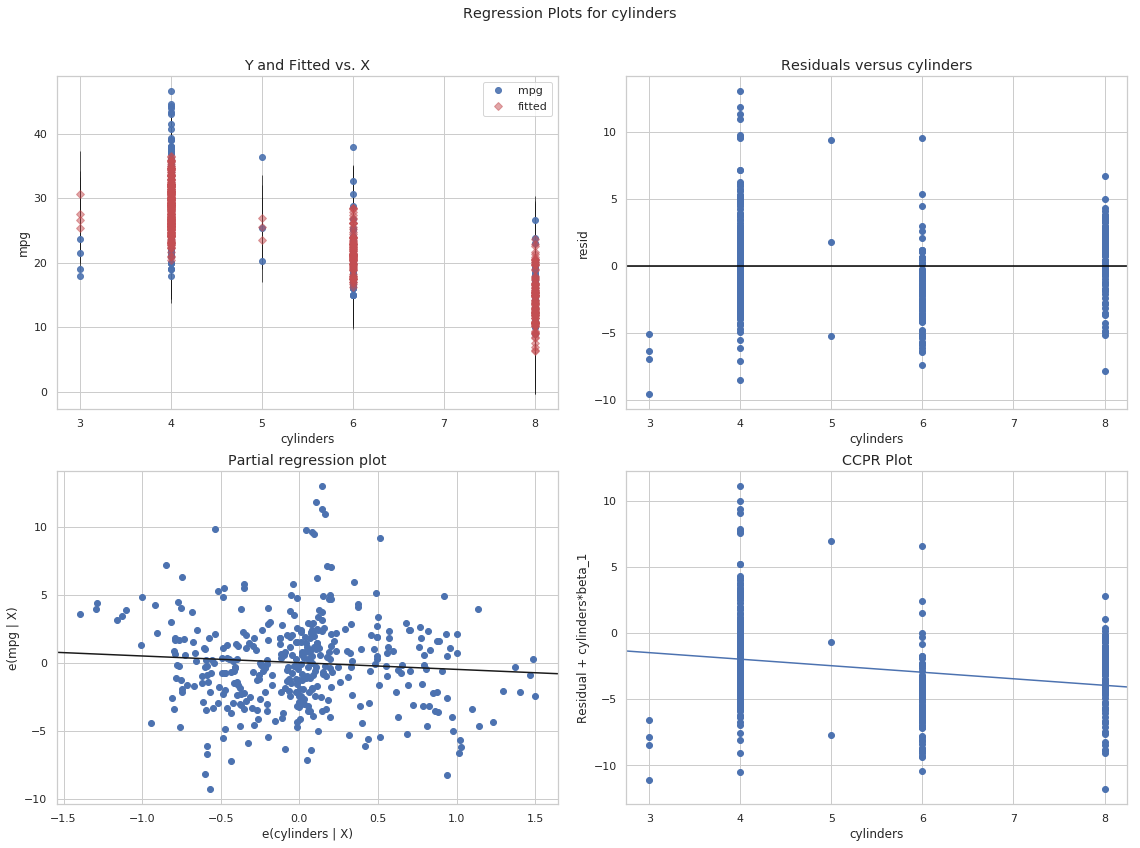

In [72]:
# Regression Plots (cylinders)
fig = plt.figure(figsize=(16, 12))
fig = sm.graphics.plot_regress_exog(results, 1, fig=fig)

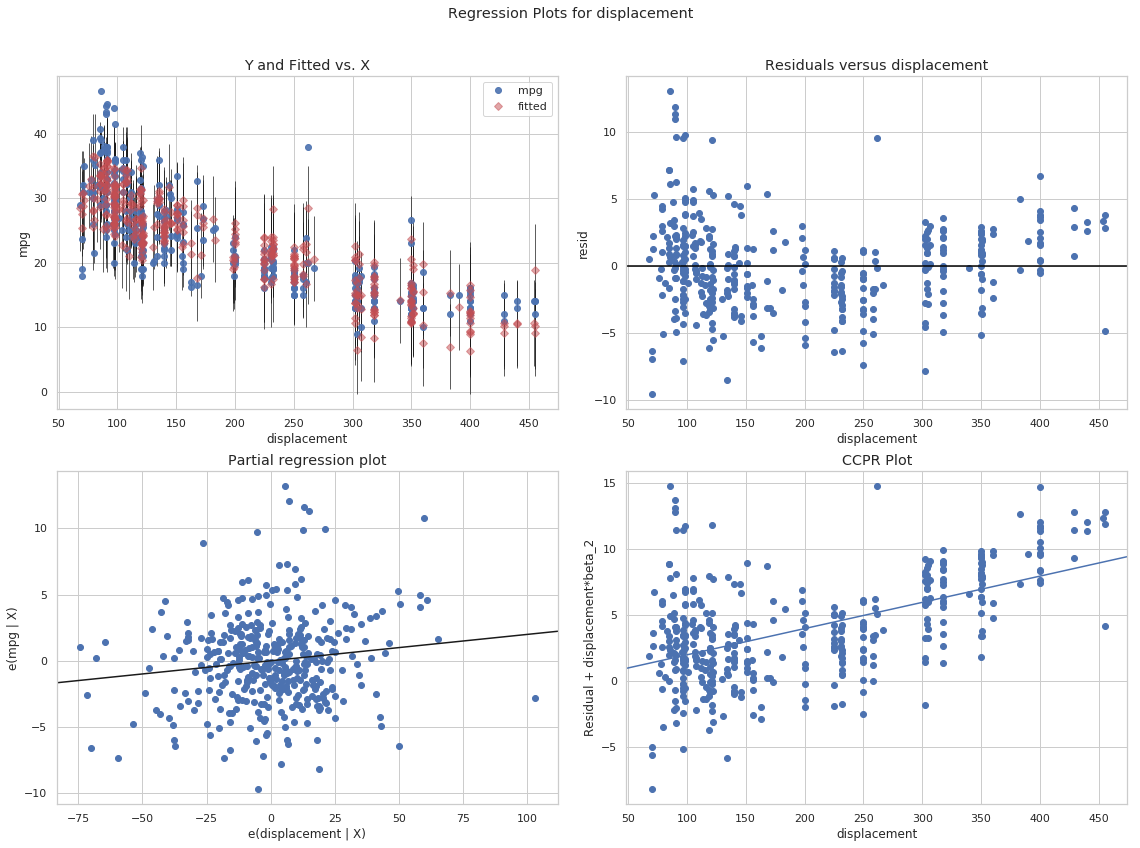

In [73]:
# Regression Plots (displacement)
fig = plt.figure(figsize=(16, 12))
fig = sm.graphics.plot_regress_exog(results, 'displacement', fig=fig)

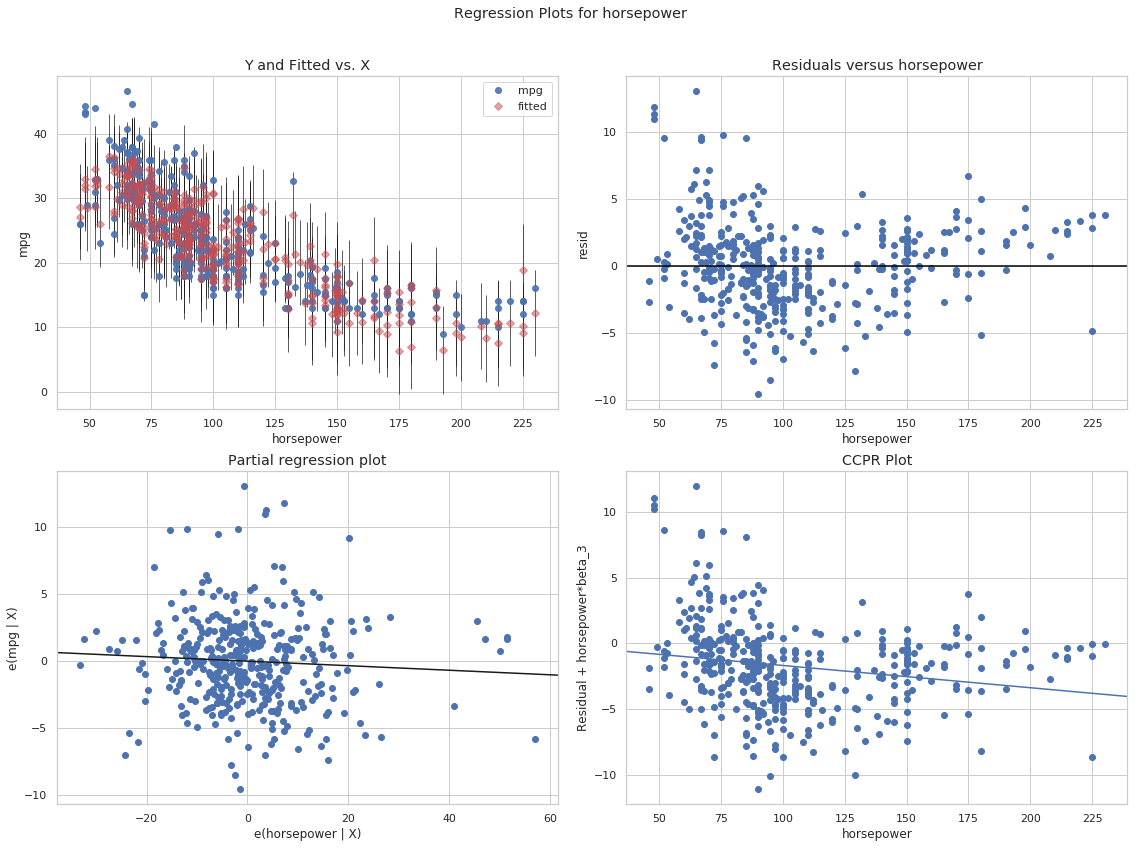

In [74]:
# # Regression Plots (horsepower)
fig = plt.figure(figsize=(16, 12))
fig = sm.graphics.plot_regress_exog(results, 3, fig=fig)

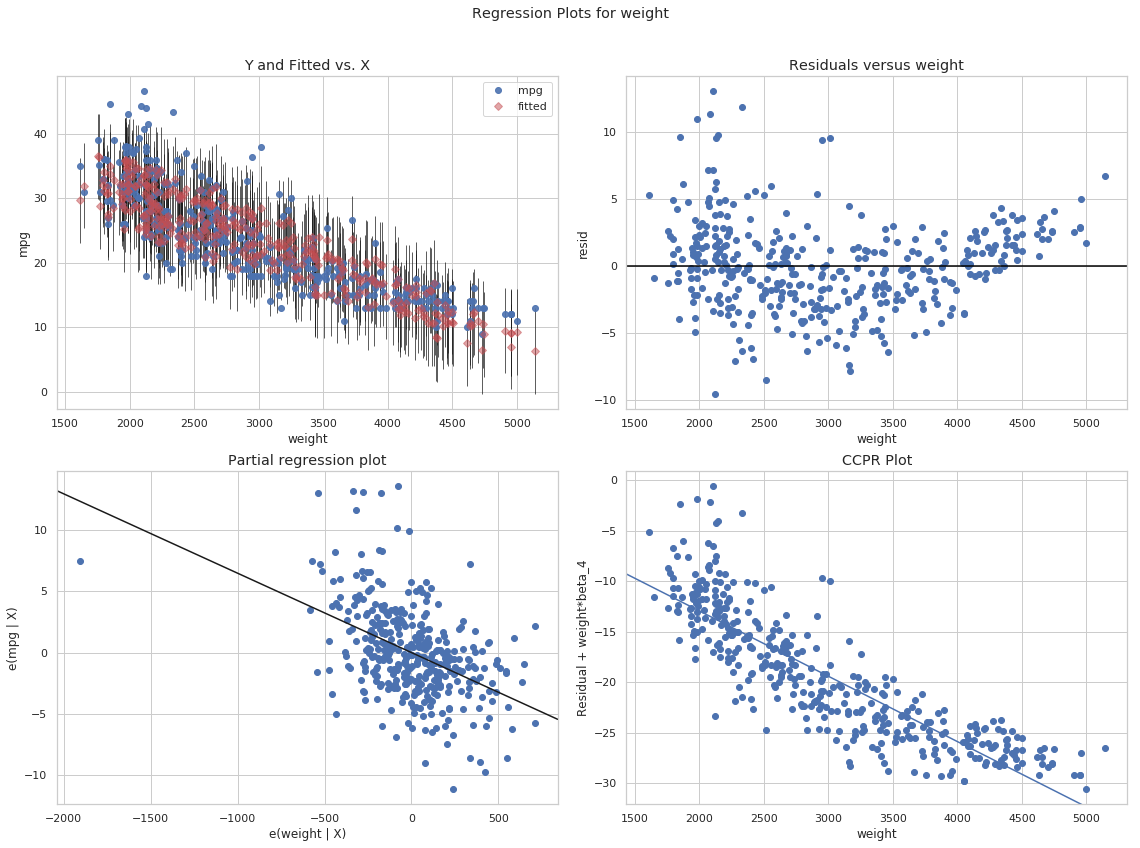

In [75]:
# Regression Plots (weight)
fig = plt.figure(figsize=(16, 12))
fig = sm.graphics.plot_regress_exog(results, 'weight', fig=fig)

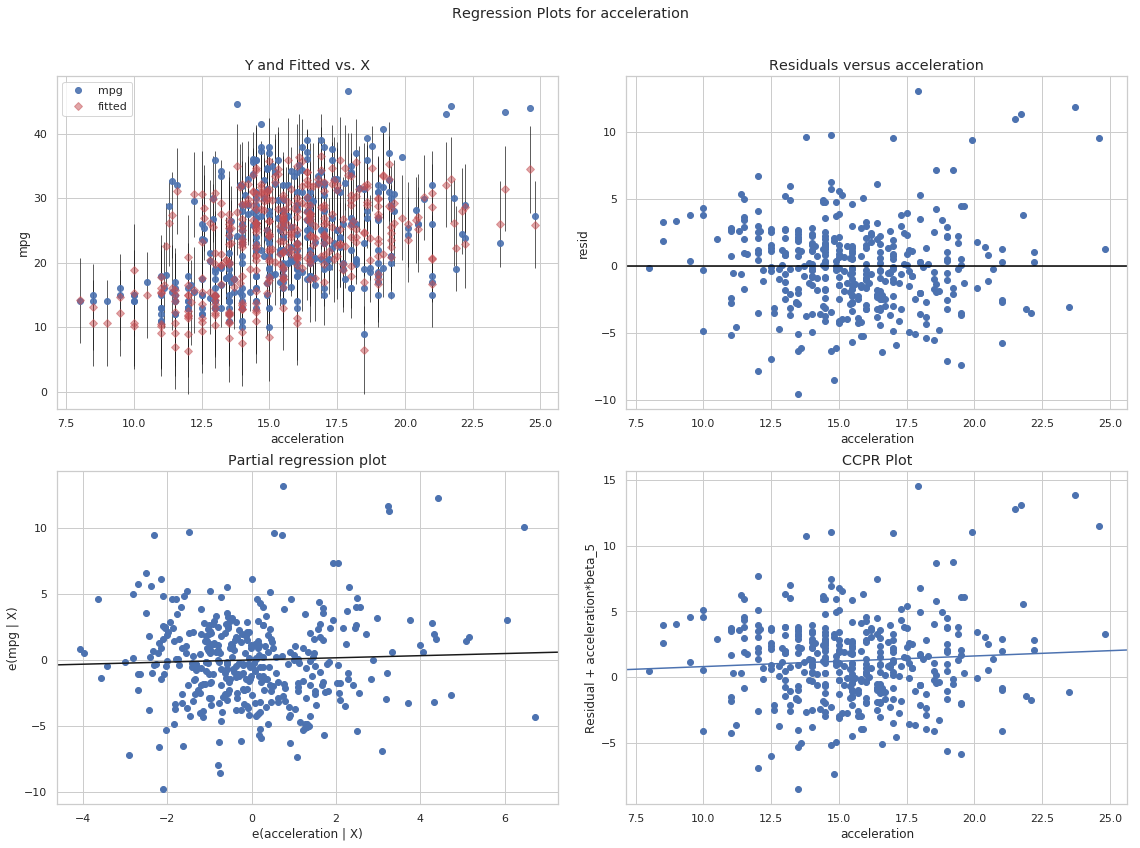

In [76]:
# Regression Plots (acceleration)
fig = plt.figure(figsize=(16, 12))
fig = sm.graphics.plot_regress_exog(results, 5, fig=fig)

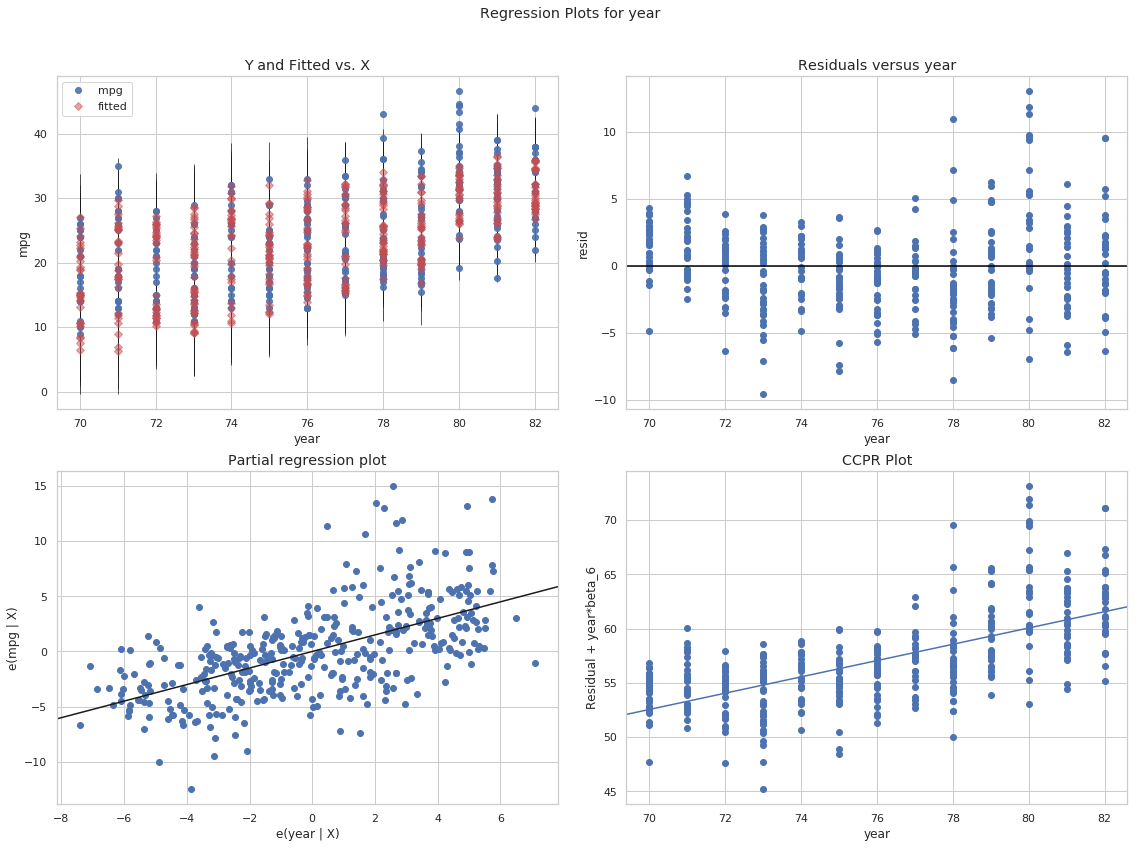

In [77]:
# Regression Plots (year)
fig = plt.figure(figsize=(16, 12))
fig = sm.graphics.plot_regress_exog(results, 'year', fig=fig)

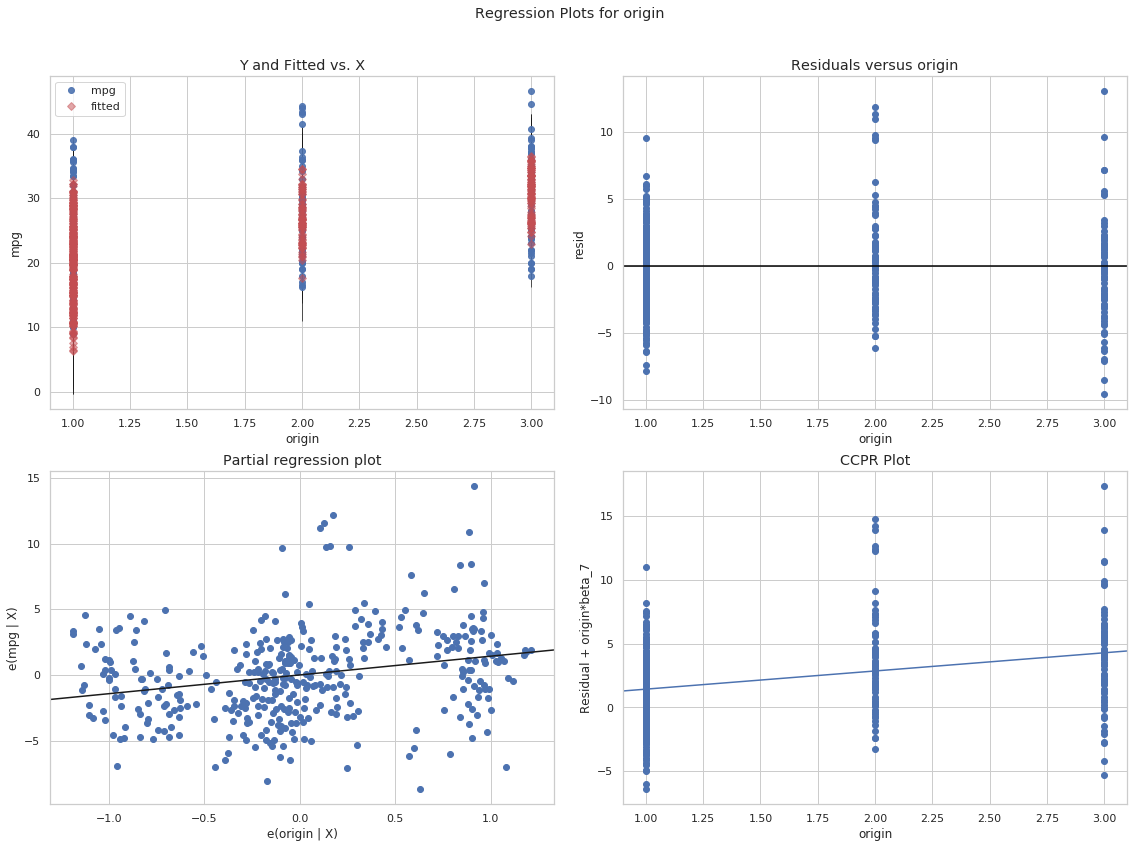

In [78]:
# Regression Plots (origin)
fig = plt.figure(figsize=(16, 12))
fig = sm.graphics.plot_regress_exog(results, 7, fig=fig)

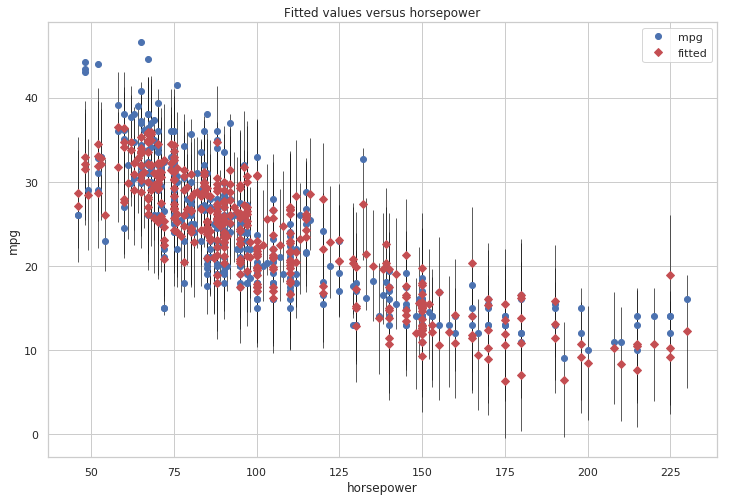

In [79]:
# Fit Plot
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(results, "horsepower", ax=ax)

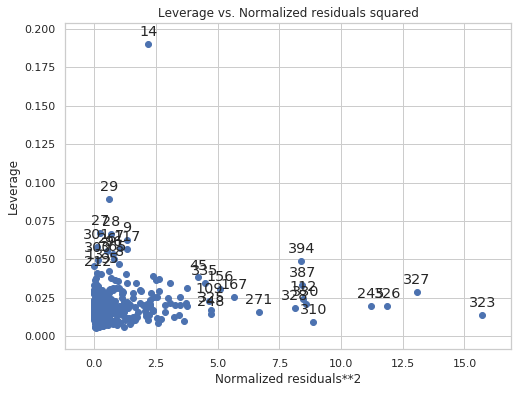

In [80]:
# Leverage-Resid2 Plot
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.plot_leverage_resid2(results, ax=ax)
plt.show()

# EXERCISE 10

In [81]:
carseats = pd.read_csv('data/carseats.csv', index_col=0)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [82]:
carseats['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [83]:
carseats['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

## 10a

In [84]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Fitting models using R-style formulas: [https://www.statsmodels.org/dev/example_formulas.html](https://www.statsmodels.org/dev/example_formulas.html)

In [85]:
model = smf.ols(formula = 'Sales ~ Price + Urban + US', data=carseats)

In [86]:
results = model.fit()

In [87]:
print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.234    
Dependent Variable: Sales            AIC:                1863.3121
Date:               2019-03-01 20:30 BIC:                1879.2779
No. Observations:   400              Log-Likelihood:     -927.66  
Df Model:           3                F-statistic:        41.52    
Df Residuals:       396              Prob (F-statistic): 2.39e-23 
R-squared:          0.239            Scale:              6.1132   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     13.0435    0.6510   20.0357  0.0000  11.7636  14.3233
Urban[T.Yes]  -0.0219    0.2717   -0.0807  0.9357  -0.5560   0.5121
US[T.Yes]      1.2006    0.2590    4.6347  0.0000   0.6913   1.7098
Price         -0.0545    0.0052  -10.3892  0.0000  -0.0648  -0.0442
------

## 10e

In [88]:
model = smf.ols(formula = 'Sales ~ Price + US', data=carseats)

In [89]:
results = model.fit()

In [90]:
print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.235    
Dependent Variable: Sales            AIC:                1861.3186
Date:               2019-03-01 20:30 BIC:                1873.2930
No. Observations:   400              Log-Likelihood:     -927.66  
Df Model:           2                F-statistic:        62.43    
Df Residuals:       397              Prob (F-statistic): 2.66e-24 
R-squared:          0.239            Scale:              6.0979   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     13.0308    0.6310   20.6518  0.0000  11.7903  14.2713
US[T.Yes]      1.1996    0.2585    4.6415  0.0000   0.6915   1.7078
Price         -0.0545    0.0052  -10.4161  0.0000  -0.0648  -0.0442
------------------------------------------------------------------
Omnibus

## 10g

In [91]:
results.conf_int()

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


Sources:
* [https://github.com/yahwes/ISLR/blob/master/ch03soln.Rmd](https://github.com/yahwes/ISLR/blob/master/ch03soln.Rmd)
* [https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034](https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034)
* [https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html)
* [https://machinelearningmastery.com](https://machinelearningmastery.com)
* [https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9](https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9)